# Alex Germick Midterm Exam Logistic Submission
GitHub Link: https://github.com/Germick/UTD-2018

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

# Import Data and Check for N/A

In [46]:
churn = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

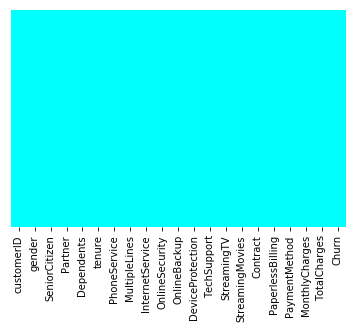

In [47]:
sns.heatmap(churn.isnull(),yticklabels=False,cbar=False,cmap='cool')
churn.isnull().sum()

In [48]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [49]:
# Total Charges is listed as Object when should be float64
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'].str.replace(' ',''), errors='force')
churn['TotalCharges'] = churn.TotalCharges.astype(float)
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [50]:
#Due to large amount of observations, dropping 11 rows will not effect model
churn = churn.dropna()
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Drop customer ID and Explore data

In [51]:
churn = churn.drop(['customerID'], axis=1)
churn = pd.get_dummies(churn, columns=["Churn"], drop_first= True)

Male      3549
Female    3483
Name: gender, dtype: int64

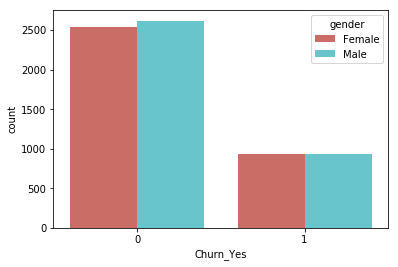

In [52]:
#Gender
sns.countplot(x='Churn_Yes',hue='gender', data=churn,palette='hls')
churn["gender"].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

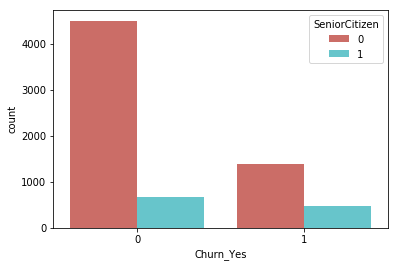

In [84]:
#Senior Citizen
sns.countplot(x='Churn_Yes',hue='SeniorCitizen', data=churn,palette='hls')
churn["SeniorCitizen"].value_counts()

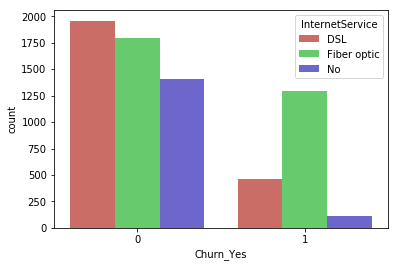

In [53]:
#Internet Service
sns.countplot(x='Churn_Yes',hue='InternetService', data=churn,palette='hls')

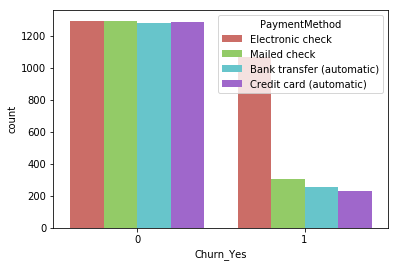

In [56]:
#Payment Method
sns.countplot(x='Churn_Yes',hue='PaymentMethod', data=churn,palette='hls')

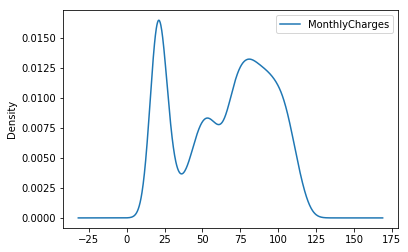

In [54]:
churn.plot.density(y='MonthlyCharges')

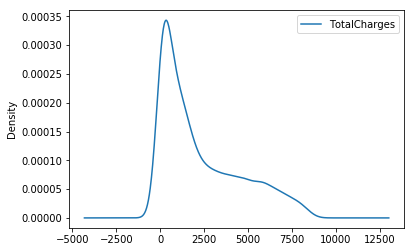

In [55]:
churn.plot.density(y='TotalCharges')

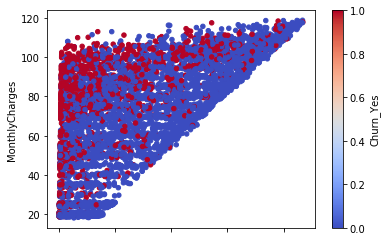

In [67]:
churn.plot.scatter(x='TotalCharges',y='MonthlyCharges',c='Churn_Yes',cmap='coolwarm')

# Convert categorical variables into binary variables

In [57]:
#Gender to binary where 1 means male
churn = pd.get_dummies(churn, columns=["gender"], drop_first= True)

#Partner to binary where 1 means they have a partner
churn = pd.get_dummies(churn, columns=["Partner"], drop_first= True)

#Dependents to binary where 1 means they have dependents
churn = pd.get_dummies(churn, columns=["Dependents"], drop_first= True)

#Phone Service to binary where 1 means they have service
churn = pd.get_dummies(churn, columns=["PhoneService"], drop_first= True)

#Multiple lines to binary where 1 means multiple, drop No phone service as it is already represented above
churn = pd.get_dummies(churn, columns=["MultipleLines"], drop_first= False)
churn = churn.drop(['MultipleLines_No phone service','MultipleLines_No'], axis=1)

#Internet Service broken into two categories, No service is represented by having zero on both variables.
churn = pd.get_dummies(churn, columns=["InternetService"], drop_first= False)
churn = churn.drop(['InternetService_No'], axis=1)

# Internet Extras are broken down and then NO and No Service are removed as they are represented above
churn = pd.get_dummies(churn, columns=["OnlineSecurity"], drop_first= False)
churn = pd.get_dummies(churn, columns=["OnlineBackup"], drop_first= False)
churn = pd.get_dummies(churn, columns=["DeviceProtection"], drop_first= False)
churn = pd.get_dummies(churn, columns=["TechSupport"], drop_first= False)
churn = pd.get_dummies(churn, columns=["StreamingTV"], drop_first= False)
churn = pd.get_dummies(churn, columns=["StreamingMovies"], drop_first= False)
churn = pd.get_dummies(churn, columns=["PaperlessBilling"], drop_first= True)
churn = churn.drop(['OnlineSecurity_No internet service','OnlineSecurity_No', 'OnlineBackup_No internet service','OnlineBackup_No', 'DeviceProtection_No','DeviceProtection_No internet service','TechSupport_No','TechSupport_No internet service','StreamingTV_No','StreamingTV_No internet service','StreamingMovies_No','StreamingMovies_No internet service'], axis=1)

# Convert Payment method to 4 binary variables
churn = pd.get_dummies(churn, columns=["PaymentMethod"], drop_first= False)

# Convert Contract to binary dropping month-to-month
churn = pd.get_dummies(churn, columns=["Contract"], drop_first= True)


In [58]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
SeniorCitizen                              7032 non-null int64
tenure                                     7032 non-null int64
MonthlyCharges                             7032 non-null float64
TotalCharges                               7032 non-null float64
Churn_Yes                                  7032 non-null uint8
gender_Male                                7032 non-null uint8
Partner_Yes                                7032 non-null uint8
Dependents_Yes                             7032 non-null uint8
PhoneService_Yes                           7032 non-null uint8
MultipleLines_Yes                          7032 non-null uint8
InternetService_DSL                        7032 non-null uint8
InternetService_Fiber optic                7032 non-null uint8
OnlineSecurity_Yes                         7032 non-null uint8
OnlineBackup_Yes                           7032 non-null uint8
DeviceP

# Fit the Model

In [60]:
x = churn.drop('Churn_Yes',axis=1)
y = churn["Churn_Yes"]

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [64]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
pred = logmodel.predict(x_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87      1580
          1       0.64      0.55      0.59       530

avg / total       0.80      0.81      0.80      2110



# Conclusion

In [83]:
Names = list(x.columns)
Coefficients = list(logmodel.coef_)
Results = pd.DataFrame(Names,Coefficients)
Results

,0
0.284768,SeniorCitizen
-0.056944,tenure
0.022759,MonthlyCharges
0.000271,TotalCharges
-0.020034,gender_Male
-0.017107,Partner_Yes
-0.118350,Dependents_Yes
-1.051363,PhoneService_Yes
0.087593,MultipleLines_Yes
0.241557,InternetService_DSL


# Insights
Senior Citizen
- Being a senior citizen increases the likelihood of churning. Roughly the same number of senior citizens churned than didn't churn.

Monthly vs. Total Charges
- Total Charges did not have nearly the amount of prediction power as Monthly Charges. This makes sense as consumers are more likely to be aware of their monthly bill rather than how much they have spent overall. 

Fiber Optic Internet Service
- Having Fiber optic internet service increases the chances of churn. Fiber is fairly new so people with Fiber service are probably more savy and picky consumers.You can see that the tenure of Fiber customers is much shorter than other customers.

In [115]:
Fiber = churn[churn["InternetService_Fiber optic"]==1]
NoFiber = churn[churn["InternetService_Fiber optic"]==0]

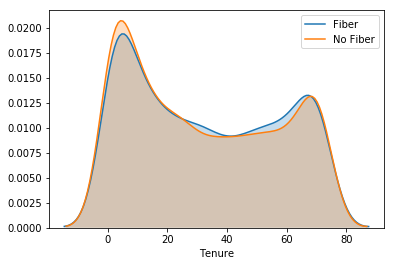

In [116]:
sns.kdeplot(Fiber.tenure, label='Fiber', shade=True)
sns.kdeplot(NoFiber.tenure, label='No Fiber', shade=True)
plt.xlabel('Tenure');